# WHO Life Expectancy Clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import pylab as pl
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/Users/miguel/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Ensuring the graphs created are displayed without the need to "call" them specifically

%matplotlib inline

In [3]:
path = r'/Users/miguel/Desktop/CareerFoundry Bootcamp/Data Immersion/A6 Life Expectancy Project'

In [4]:
# Importing data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'life_expectancy_aggregated.csv'), index_col = False)

### Normalizing numeric columns

In [5]:
# Normalizing numeric columns

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Creating a MinMaxScaler
scaler = MinMaxScaler()

# Applying Min-Max scaling to df
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [6]:
# Checking work
df.head()

,Unnamed: 0,index,Country,Life_expectancy,Adult_mortality,Infant_mortality,Alcohol_consumption,HepB_immunization,Measles_cases,BMI,...,Polio_immunization,Total_health_expenditure,Diphtheria_immunization,HIV_AIDS_deaths,GDP_per_capita,Population,Thinness_1_19_years,Thinness_5_9_years,Human_development_index,Schooling_years
0,0.000000,0.000000,Afghanistan,0.383445,0.346806,0.055340,0.000305,0.621978,0.143258,0.306789,...,0.282222,0.391204,0.417778,0.000000,0.004493,0.023030,0.687917,0.542385,0.402047,0.408553
1,0.005263,0.005263,Albania,0.786789,0.057080,0.000719,0.424644,0.992674,0.023356,0.925557,...,0.988889,0.255814,0.988889,0.000000,0.022183,0.002463,0.055597,0.056274,0.741263,0.585526
2,0.010526,0.010526,Algeria,0.764214,0.123172,0.014773,0.065532,0.820245,0.715897,0.539290,...,0.939506,0.217314,0.939506,0.000000,0.051886,0.030230,0.219504,0.208333,0.742679,0.660088
3,0.015789,0.015789,Angola,0.105948,0.534062,0.062938,0.401186,0.761574,0.143258,0.303988,...,0.436508,0.144652,0.336508,0.091877,0.029555,0.017037,0.169438,0.207820,0.431109,0.357378
4,0.021053,0.021053,Antigua and Barbuda,0.783184,0.172141,0.000000,0.589958,0.981305,0.000000,0.957995,...,0.977083,0.192012,0.992361,0.000986,0.150991,0.000075,0.123239,0.117636,0.484794,0.436369


In [7]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'index', 'Country'], axis=1)

In [8]:
# Checking work
df.head()

,Life_expectancy,Adult_mortality,Infant_mortality,Alcohol_consumption,HepB_immunization,Measles_cases,BMI,Under_5_deaths,Polio_immunization,Total_health_expenditure,Diphtheria_immunization,HIV_AIDS_deaths,GDP_per_capita,Population,Thinness_1_19_years,Thinness_5_9_years,Human_development_index,Schooling_years
0,0.383445,0.346806,0.055340,0.000305,0.621978,0.143258,0.306789,0.057283,0.282222,0.391204,0.417778,0.000000,0.004493,0.023030,0.687917,0.542385,0.402047,0.408553
1,0.786789,0.057080,0.000719,0.424644,0.992674,0.023356,0.925557,0.000543,0.988889,0.255814,0.988889,0.000000,0.022183,0.002463,0.055597,0.056274,0.741263,0.585526
2,0.764214,0.123172,0.014773,0.065532,0.820245,0.715897,0.539290,0.012862,0.939506,0.217314,0.939506,0.000000,0.051886,0.030230,0.219504,0.208333,0.742679,0.660088
3,0.105948,0.534062,0.062938,0.401186,0.761574,0.143258,0.303988,0.076009,0.436508,0.144652,0.336508,0.091877,0.029555,0.017037,0.169438,0.207820,0.431109,0.357378
4,0.783184,0.172141,0.000000,0.589958,0.981305,0.000000,0.957995,0.000000,0.977083,0.192012,0.992361,0.000986,0.150991,0.000075,0.123239,0.117636,0.484794,0.436369


### Clustering

#### Elbow Technique

In [9]:
num_cl = range(1, 10) # Defining the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defining k-means clusters in the range assigned above

In [10]:
# Creating a score that represents a rate of variation for the given cluster option

score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

score

[-108.55347359781568,
 -74.80136665340386,
 -63.271674333023974,
 -58.309642758970675,
 -54.40846887387454,
 -50.362740986231486,
 -47.16386621718708,
 -44.57829792800688,
 -42.16353174495539]

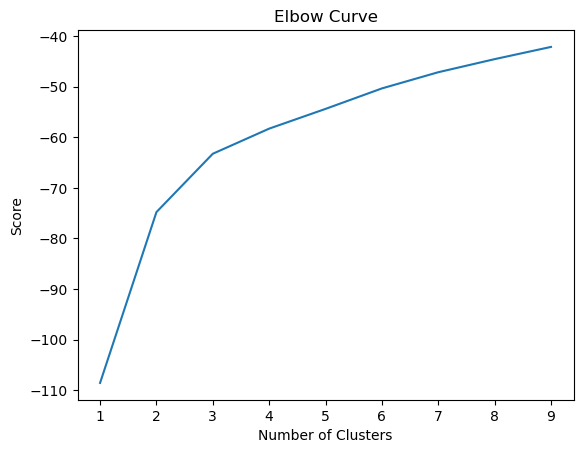

In [11]:
# Plotting the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
plt.savefig('elbow_curve.png')
pl.show()

There's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

#### K-means clustering

In [12]:
# Creating the k-means object

kmeans = KMeans(n_clusters = 3)

In [13]:
# Fitting the k-means object to the data

kmeans.fit(df)

KMeans(n_clusters=3)

In [14]:
# Adding clusters column
df['clusters'] = kmeans.fit_predict(df)

In [15]:
# Checking work
df.head()

,Life_expectancy,Adult_mortality,Infant_mortality,Alcohol_consumption,HepB_immunization,Measles_cases,BMI,Under_5_deaths,Polio_immunization,Total_health_expenditure,Diphtheria_immunization,HIV_AIDS_deaths,GDP_per_capita,Population,Thinness_1_19_years,Thinness_5_9_years,Human_development_index,Schooling_years,clusters
0,0.383445,0.346806,0.055340,0.000305,0.621978,0.143258,0.306789,0.057283,0.282222,0.391204,0.417778,0.000000,0.004493,0.023030,0.687917,0.542385,0.402047,0.408553,1
1,0.786789,0.057080,0.000719,0.424644,0.992674,0.023356,0.925557,0.000543,0.988889,0.255814,0.988889,0.000000,0.022183,0.002463,0.055597,0.056274,0.741263,0.585526,0
2,0.764214,0.123172,0.014773,0.065532,0.820245,0.715897,0.539290,0.012862,0.939506,0.217314,0.939506,0.000000,0.051886,0.030230,0.219504,0.208333,0.742679,0.660088,0
3,0.105948,0.534062,0.062938,0.401186,0.761574,0.143258,0.303988,0.076009,0.436508,0.144652,0.336508,0.091877,0.029555,0.017037,0.169438,0.207820,0.431109,0.357378,1
4,0.783184,0.172141,0.000000,0.589958,0.981305,0.000000,0.957995,0.000000,0.977083,0.192012,0.992361,0.000986,0.150991,0.000075,0.123239,0.117636,0.484794,0.436369,0


In [16]:
# Checking work
df['clusters'].value_counts()

clusters
0    84
1    62
2    45
Name: count, dtype: int64

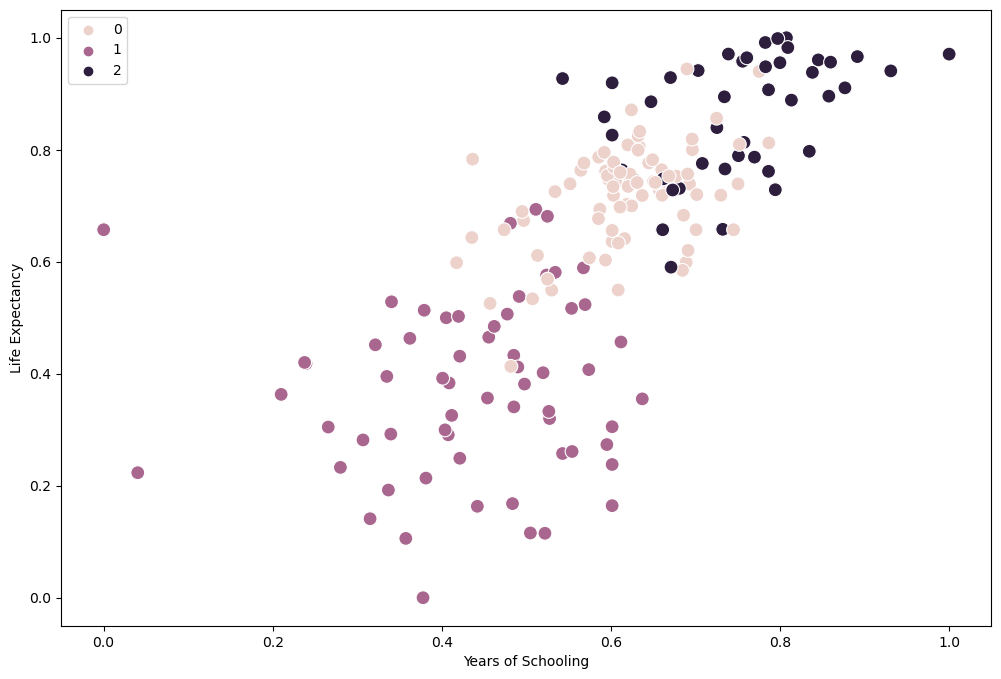

In [17]:
# Plotting the clusters for the life expectancy and schooling years

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Schooling_years'], y=df['Life_expectancy'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Years of Schooling')
plt.ylabel('Life Expectancy') 
plt.savefig('school_years_clusters.png')
plt.show()

There is a positive correlation between schooling years and life expectancy, which is consistent with our previous analysis and makes sense from a general knowledge and scientific standpoint.

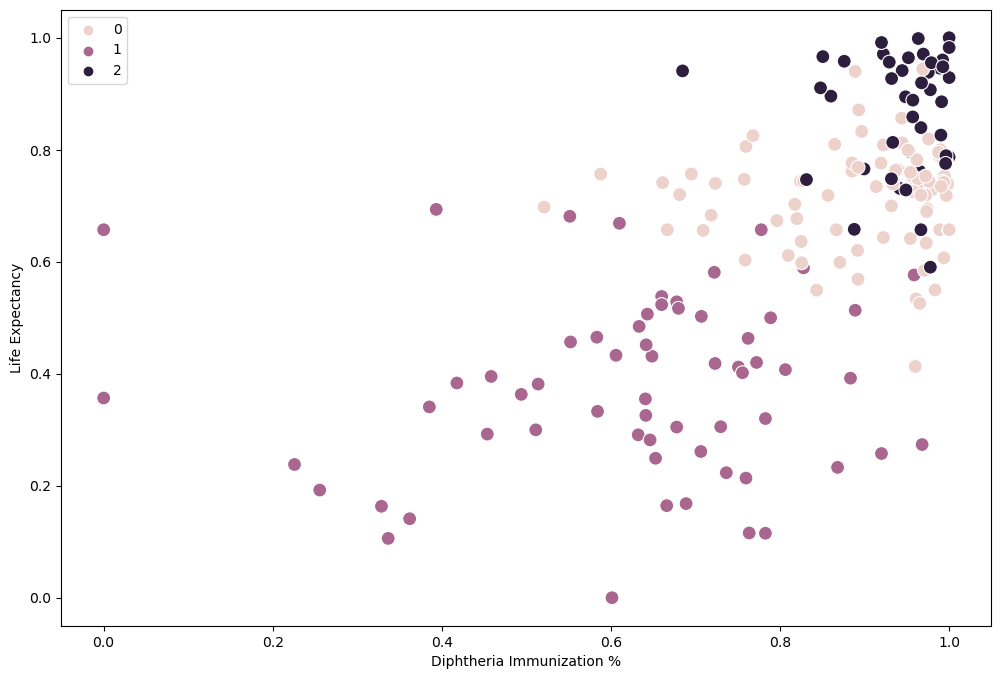

In [18]:
# Plotting the clusters for the life expectancy and diphtheria immunization

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Diphtheria_immunization'], y=df['Life_expectancy'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Diphtheria Immunization %')
plt.ylabel('Life Expectancy') 
plt.savefig('diphtheria_clusters.png')
plt.show()

There is a positive correlation between diphtheria immunization percentage and life expectancy, which is consistent with our previous analysis and makes sense from a general knowledge and scientific standpoint. 

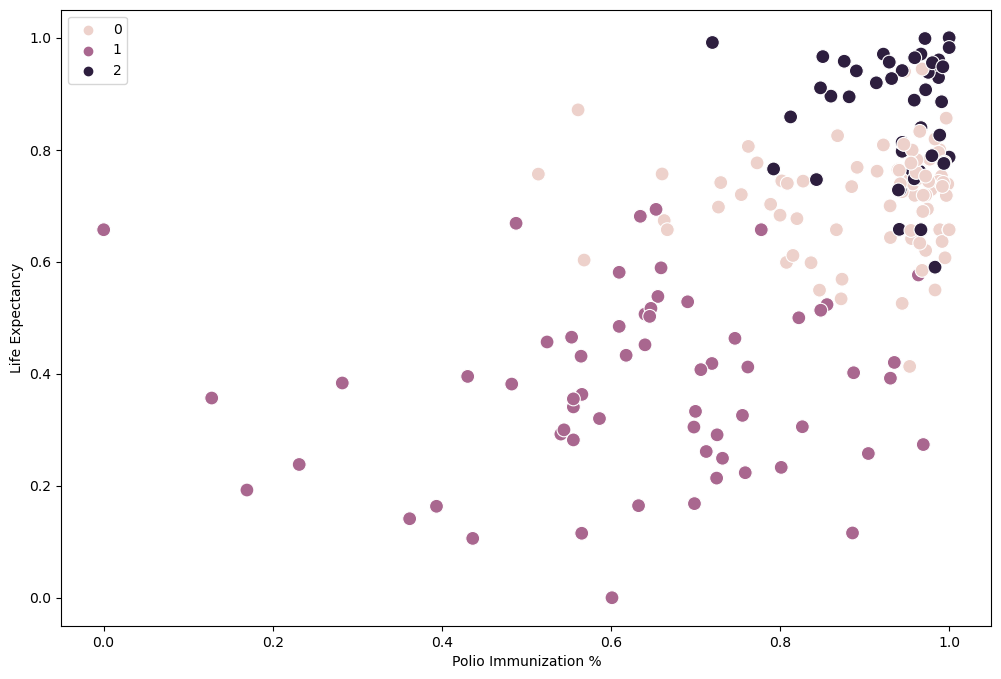

In [19]:
# Plotting the clusters for the life expectancy and polio immunization

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Polio_immunization'], y=df['Life_expectancy'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Polio Immunization %')
plt.ylabel('Life Expectancy') 
plt.savefig('polio_clusters.png')
plt.show()

There is a positive correlation between polio immunization percentage and life expectancy, which is consistent with our previous analysis and makes sense from a general knowledge and scientific standpoint. 

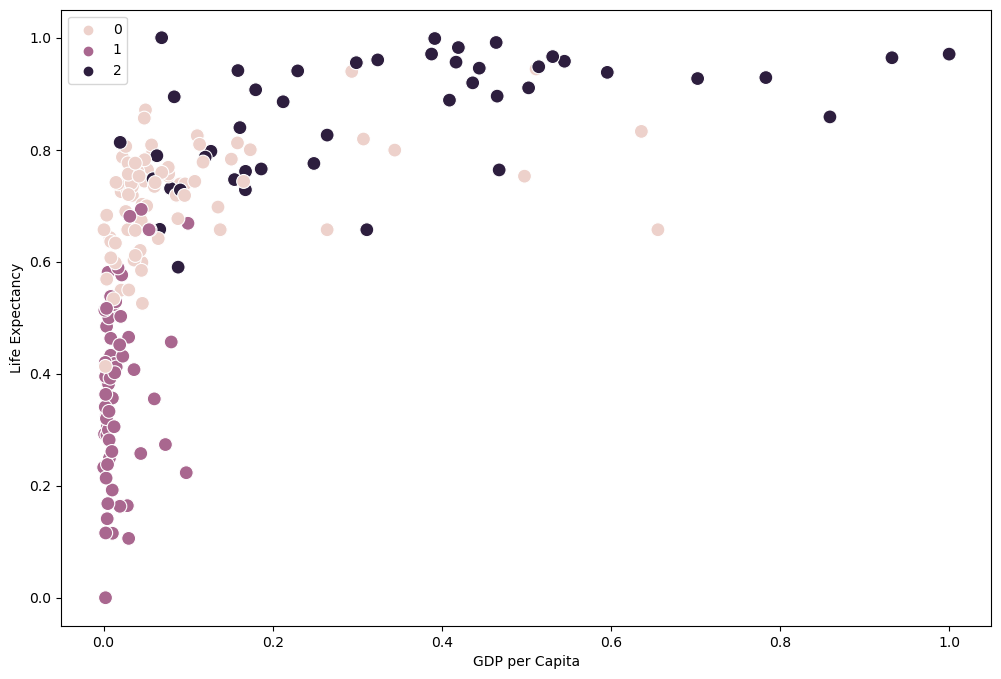

In [20]:
# Plotting the clusters for the life expectancy and GDP per capita

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['GDP_per_capita'], y=df['Life_expectancy'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy') 
plt.savefig('gdp_clusters.png')
plt.show()

There is a positive correlation between GDP per capita and life expectancy, which is consistent with our previous analysis and makes sense from a general knowledge and scientific standpoint. 

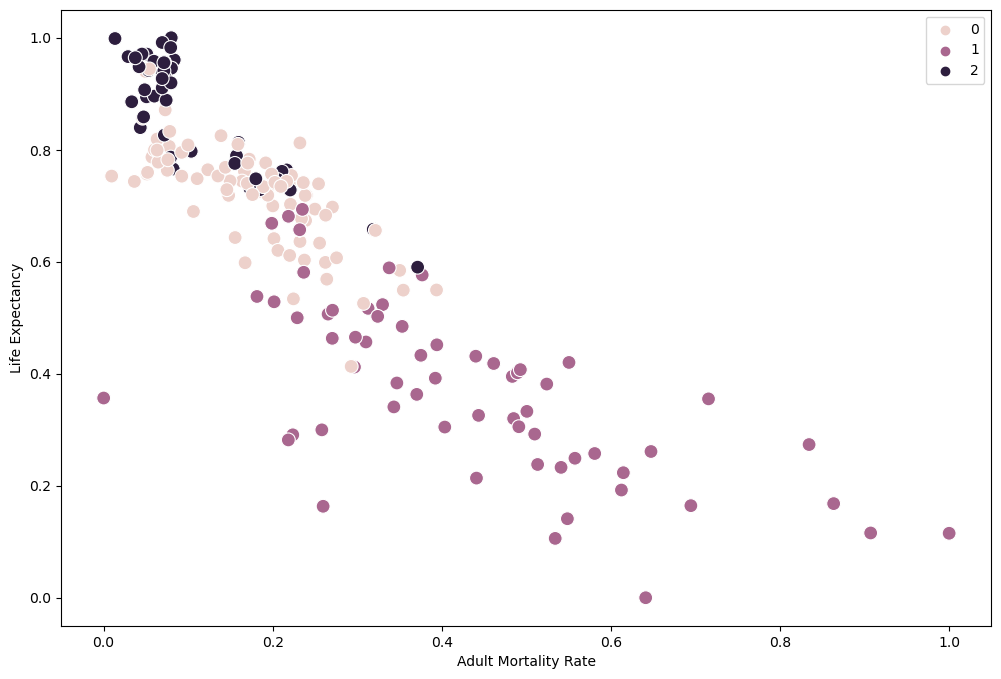

In [21]:
# Plotting the clusters for the life expectancy and adult mortality

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Adult_mortality'], y=df['Life_expectancy'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Adult Mortality Rate')
plt.ylabel('Life Expectancy') 
plt.savefig('adult_mortality_clusters.png')
plt.show()

There is a negative correlation between adult mortality rate and life expectancy, which is consistent with our previous analysis and makes sense from a general knowledge and scientific standpoint.

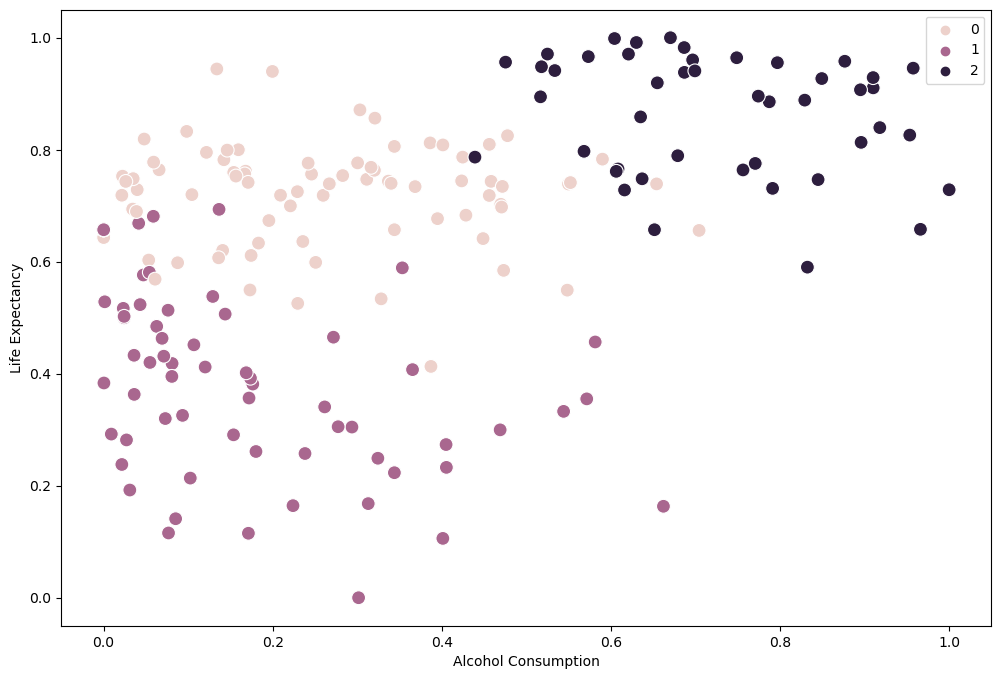

In [22]:
# Plotting the clusters for the life expectancy and alcohol consumption

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Alcohol_consumption'], y=df['Life_expectancy'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Alcohol Consumption')
plt.ylabel('Life Expectancy') 
plt.savefig('alcohol_clusters.png')
plt.show()

There is a positive correlation between alcohol consumption and life expectancy, which is consistent with our previous analysis but does not make sense from a general knowledge and scientific standpoint.

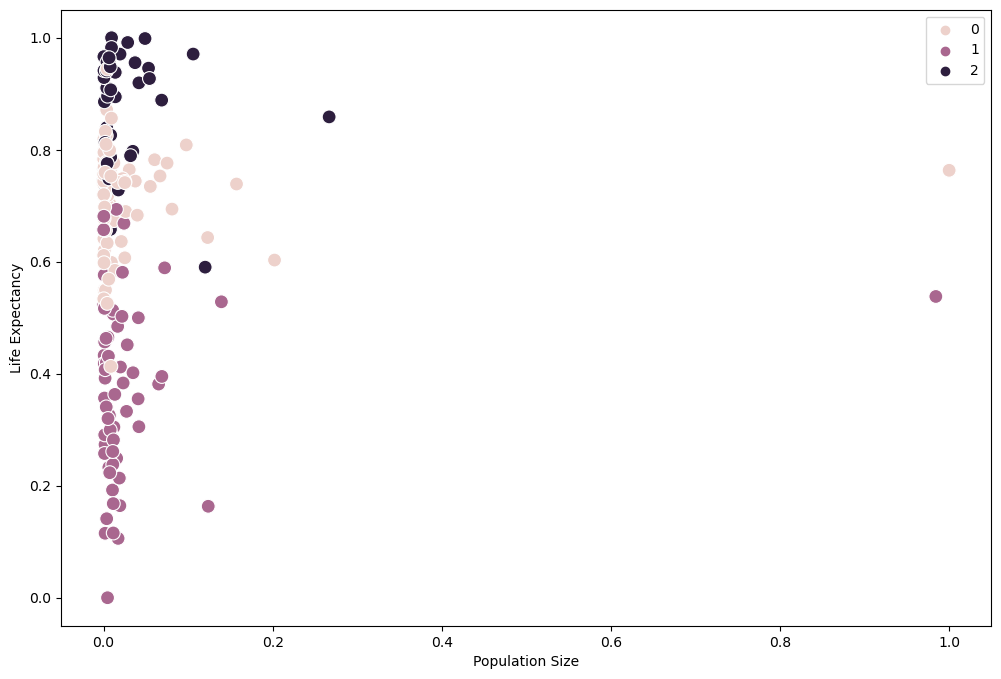

In [23]:
# Plotting the clusters for the life expectancy and population size

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Population'], y=df['Life_expectancy'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Population Size')
plt.ylabel('Life Expectancy') 
plt.savefig('population_clusters.png')
plt.show()

There is no correlation between population size and life expectancy.

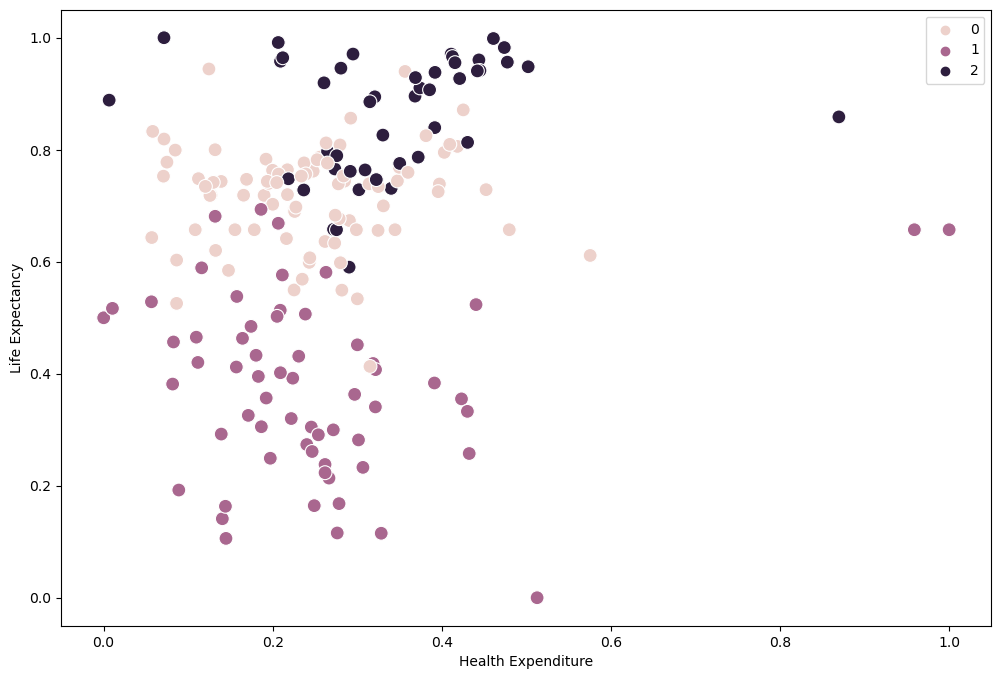

In [24]:
# Plotting the clusters for the life expectancy and health expenditure

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Total_health_expenditure'], y=df['Life_expectancy'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Health Expenditure')
plt.ylabel('Life Expectancy') 
plt.savefig('health_clusters.png')
plt.show()

There is no correlation between health expenditure and life expectancy which is consistent with our previous analysis but does not make sense from a general knowledge and scientific standpoint.

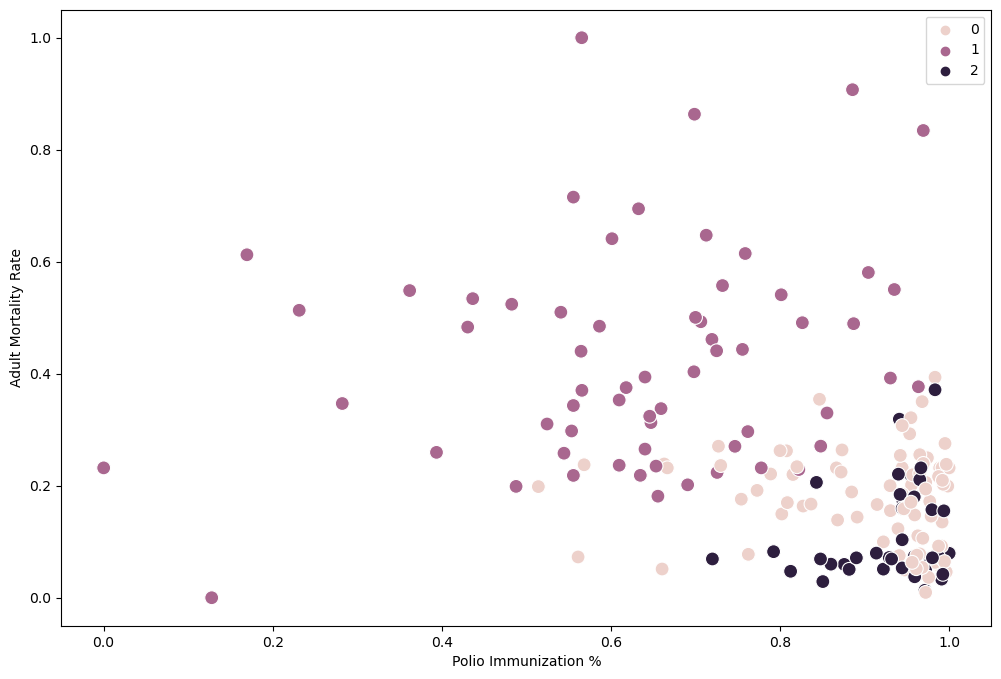

In [25]:
# Plotting the clusters for the adult mortality and polio immunization

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Polio_immunization'], y=df['Adult_mortality'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Polio Immunization %')
plt.ylabel('Adult Mortality Rate') 
plt.savefig('adultmortality_polio_clusters.png')
plt.show()

There is a negative correlation between adult mortality rate and polio immunization rates, which is consistent with our previous analysis and makes sense from a general knowledge and scientific standpoint.

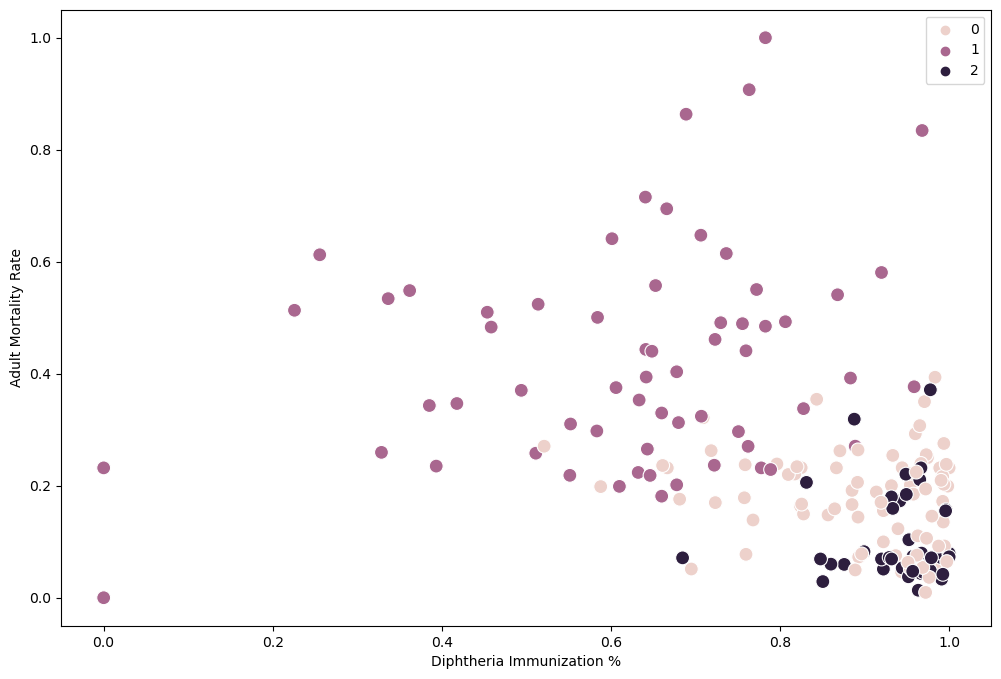

In [26]:
# Plotting the clusters for the adult mortality and diphtheria immunization

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Diphtheria_immunization'], y=df['Adult_mortality'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Diphtheria Immunization %')
plt.ylabel('Adult Mortality Rate') 
plt.savefig('adultmortality_diphtheria_clusters.png')
plt.show()

There is a negative correlation between adult mortality rate and diphtheria immunization rates, which is consistent with our previous analysis and makes sense from a general knowledge and scientific standpoint.

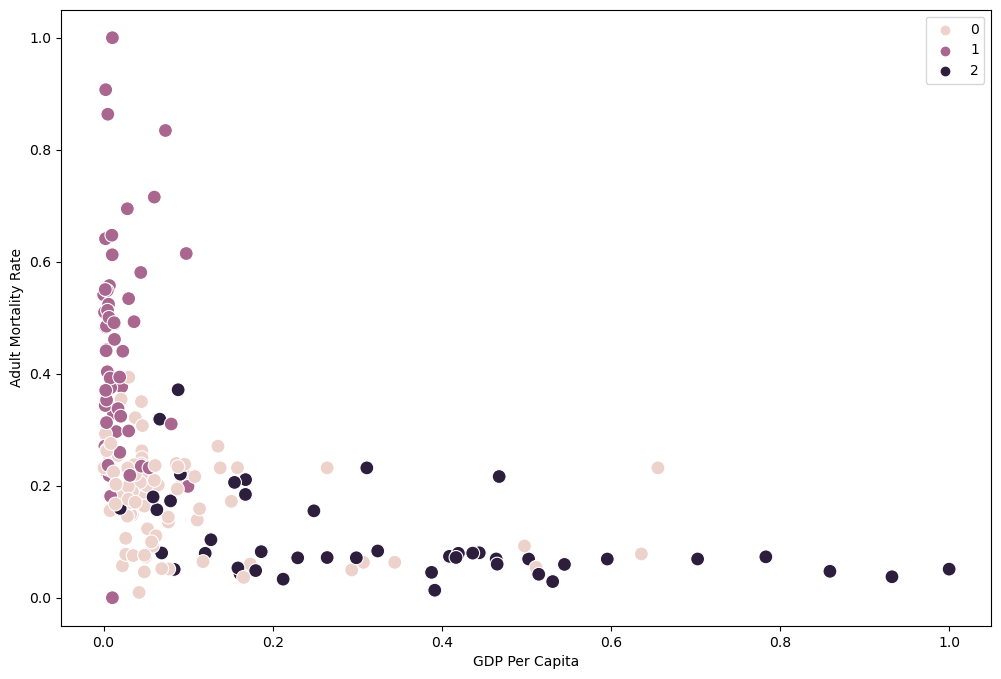

In [27]:
# Plotting the clusters for the adult mortality and gdp per capita

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['GDP_per_capita'], y=df['Adult_mortality'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('GDP Per Capita')
plt.ylabel('Adult Mortality Rate') 
plt.savefig('adultmortality_gdp_clusters.png')
plt.show()

There is a negative correlation between adult mortality rate and GDP per capita, which is consistent with our previous analysis and makes sense from a general knowledge and scientific standpoint.

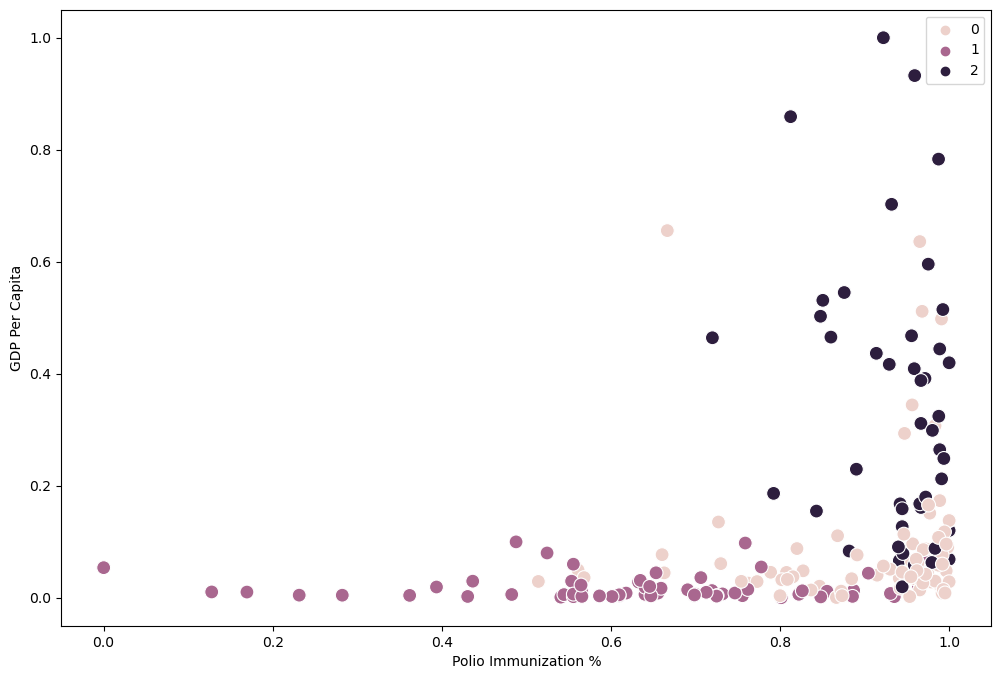

In [28]:
# Plotting the clusters for the gdp per capita and polio immunization

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Polio_immunization'], y=df['GDP_per_capita'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Polio Immunization %')
plt.ylabel('GDP Per Capita') 
plt.savefig('gdp_polio_clusters.png')
plt.show()

There is a positive correlation between GDP per capita and polio immunization rates, which is consistent with our previous analysis and makes sense from a general knowledge and scientific standpoint. 

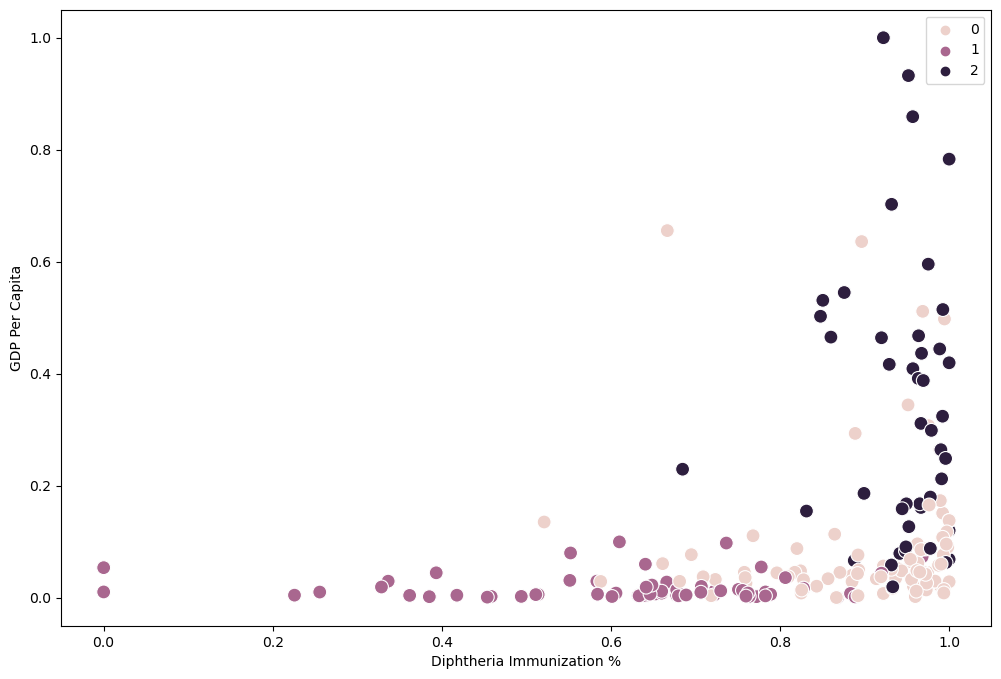

In [29]:
# Plotting the clusters for the gdp per capita and diphtheria immunization

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Diphtheria_immunization'], y=df['GDP_per_capita'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Diphtheria Immunization %')
plt.ylabel('GDP Per Capita') 
plt.savefig('gdp_diphtheria_clusters.png')
plt.show()

There is a positive correlation between GDP per capita and diphtheria immunization rates, which is consistent with our previous analysis and makes sense from a general knowledge and scientific standpoint. 

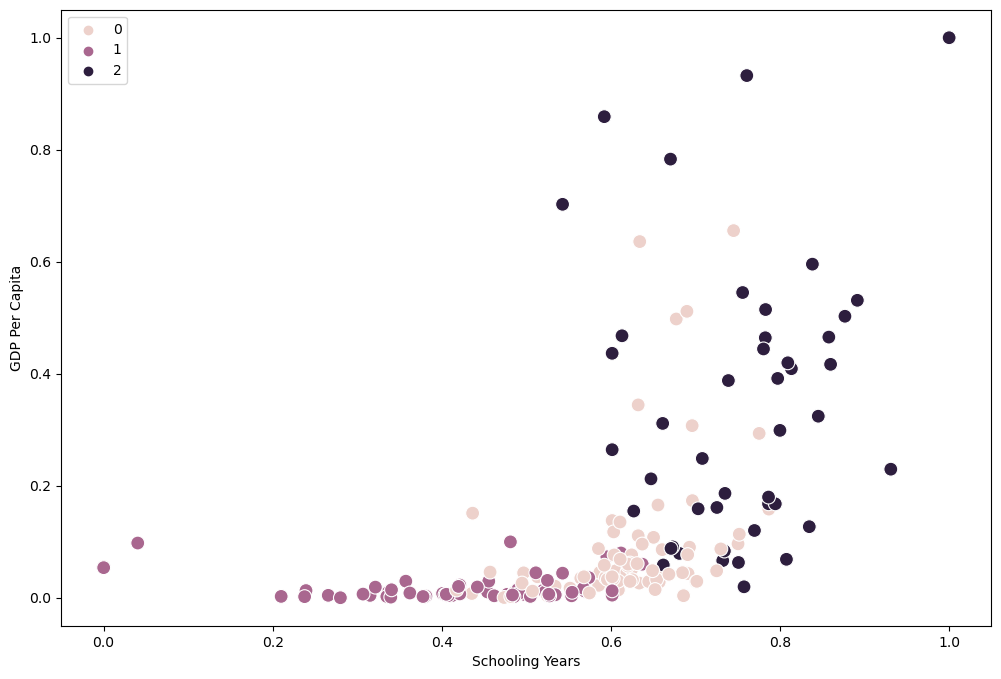

In [30]:
# Plotting the clusters for the gdp per capita and schooling years

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Schooling_years'], y=df['GDP_per_capita'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Schooling Years')
plt.ylabel('GDP Per Capita') 
plt.savefig('gdp_schooling_clusters.png')
plt.show()

There is a positive correlation between GDP per capita and years of schooling, which is consistent with our previous analysis and makes sense from a general knowledge and scientific standpoint.

In [31]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [32]:
# Calculating the descriptive statistics for your clusters

df.groupby('cluster').agg({'Schooling_years':['mean', 'median'], 
                         'Diphtheria_immunization':['mean', 'median'], 
                         'Polio_immunization':['mean', 'median'],
                          'GDP_per_capita':['mean', 'median'],
                            'Adult_mortality':['mean', 'median'],
                            'Alcohol_consumption':['mean', 'median'],
                            'Population':['mean', 'median'],
                            'Total_health_expenditure':['mean', 'median'],
                            'Life_expectancy':['mean', 'median']})

Schooling_years           Diphtheria_immunization            \
                       mean    median                    mean    median   
cluster                                                                   
dark purple        0.750887  0.757401                0.943935  0.957143   
pink               0.617699  0.620183                0.897850  0.941628   
purple             0.427961  0.454718                0.626710  0.656389   

            Polio_immunization           GDP_per_capita            \
                          mean    median           mean    median   
cluster                                                             
dark purple           0.936973  0.958730       0.337739  0.298838   
pink                  0.904869  0.954861       0.091693  0.045618   
purple                0.633913  0.646578       0.018365  0.008352   

            Adult_mortality           Alcohol_consumption            \
                       mean    median                mean    median   
cluster                                                               
dark purple        0.106122  0.073002            0.724351  0.696632   
pink               0.179100  0.192889            0.247234  0.229326   
purple             0.426008  0.393175            0.174863  0.113388   

            Population           Total_health_expenditure            \
                  mean    median                     mean    median   
cluster                                                               
dark purple   0.023908  0.007735                 0.341928  0.330241   
pink          0.028764  0.004166                 0.242569  0.238058   
purple        0.033476  0.010753                 0.249352  0.222770   

            Life_expectancy            
                       mean    median  
cluster                                
dark purple        0.864681  0.895694  
pink               0.716717  0.738873  
purple             0.376015  0.382489

#### Interpretation:

The values above are normalized, so it's hard to interpret their meaning. The mean and median values for the life expectancy clusters are consistent with a previous analysis. 